# Еще один пример для scipy (произвольная функция)

Пусть мы проверяем гипотезу, что наши точки ложатся на кривую вида $$f (x,b) = b0 + b1*exp(-b2*x^2)$$

$\textbf{Генерация тестовых данных}$

Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)

In [1]:
from pylab import*

In [2]:
from scipy.optimize import*

In [3]:
from scipy.linalg import*

In [4]:
import numpy as np

In [5]:
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)

$\textbf{зададим массив точек хi}$

In [6]:
xdata = np.linspace(0,5,50) 

Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) // можно любые коэффициентны

In [7]:
beta = (0.25, 0.75, 0.5) 

In [8]:
y = f(xdata, *beta) # создаем теоретически правильные значения точек yi (без шума)
y

array([ 1.        ,  0.99610552,  0.98454301,  0.96566897,  0.94005726,
        0.90847009,  0.8718204 ,  0.83112807,  0.7874731 ,  0.74194844,
        0.69561564,  0.64946548,  0.6043856 ,  0.56113642,  0.52033584,
        0.48245259,  0.44780767,  0.41658268,  0.38883359,  0.36450838,
        0.34346692,  0.32550167,  0.31035778,  0.29775159,  0.28738699,
        0.27896884,  0.27221363,  0.26685723,  0.26265991,  0.25940921,
        0.25692076,  0.2550377 ,  0.25362901,  0.25258716,  0.25182531,
        0.25127446,  0.25088063,  0.2506022 ,  0.25040754,  0.25027294,
        0.2501809 ,  0.25011866,  0.25007703,  0.25004948,  0.25003146,
        0.25001979,  0.25001232,  0.25000759,  0.25000463,  0.25000279])

In [9]:
ydata = y + 0.05*np.random.randn(len(xdata))

$\textbf{Решение}$

Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata

In [10]:
beta_opt, beta_cov = curve_fit(f,xdata, ydata)
beta_opt

array([ 0.24501879,  0.75413589,  0.47978413])

Вычислим, насколько велико линейное отклонение

In [11]:
lin_dev =  sum(beta_cov[0])
lin_dev

0.0002269473568773827

Вычислим, насколько велико квадратичное отклонение

In [12]:
residuals = ydata - f(xdata,*beta_opt)
residuals

array([-0.03454211,  0.04667523,  0.00794812, -0.04071691,  0.03480848,
        0.00193459, -0.10598847, -0.04549355,  0.12682635,  0.00833954,
        0.03929275, -0.00368352, -0.01114022, -0.02053654, -0.00508754,
        0.04569345, -0.00836436,  0.00629358,  0.00983352, -0.07209501,
        0.01123425,  0.01727595,  0.02258147,  0.03488927,  0.01681608,
       -0.05409389, -0.01130378, -0.02724558, -0.06311068, -0.11231427,
        0.00037965,  0.01219867, -0.02580405, -0.06611743, -0.02244841,
        0.01463344, -0.07422258,  0.0677175 ,  0.02500358,  0.05091575,
        0.08619386,  0.05383478,  0.00673491,  0.00651165, -0.02999357,
        0.1222842 , -0.06077023,  0.03442392, -0.0262617 ,  0.01005984])

In [13]:
fres = sum(residuals**2)
fres

0.11936913791831234

$\textbf{Нарисуем полученное решение}$

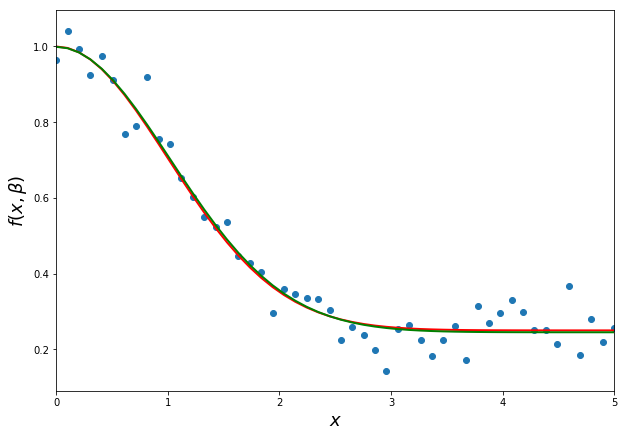

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'g', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()